# Hackathon Retail 4.0 - Car Wash Challenge

This was an attempt at providing recommendations for unknown wash programs in a public competition that did not host any datasets. This project went only as far as deploying a Transformer-based segmentation model (PaddleSeg) to extract car components from natural images of vehicles in a traffic environment.

## Load necessary dependencies

If necessary make sure to install these with `pip3` using the provided `requirements.txt` list.

In [1]:
# Imports
import carw_utils
import cv2
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Add random seed
SEED = 999
np.random.seed(SEED)

## Basic setup

Right after the imports, we start off by downloading and unpacking the necessary modules to conduct image segmentation using a road-traffic relevant model from PaddleSeg, SegFormer B5.

In [2]:
# Take SegFormer_B5 configuration for PaddleSeg
pars = 'https://bj.bcebos.com/paddleseg/dygraph/cityscapes/segformer_b5_cityscapes_1024x1024_160k/model.pdparams'

# Execute environment setup
carw_utils.setup_wdir(pars_url=pars)

Environment successfully set up!


Once the setup is finished, we move on with some inference tests using the chosen configuration.

## Run inference

We will test this model on a random JPG image from `data/` - **please make sure to add one or more of your own**.

In [5]:
# Take a random image from `data/`
random_img = np.random.choice(glob.glob('data/*.jpg'), 1)[0]

# Execute PaddleSeg inference
carw_utils.run_inference(img_path=random_img)

/Users/franciscolima/Documents/Projects/carwash/carw_env/lib/python3.9/site-packages/paddle/vision/transforms/functional_pil.py:36: DeprecationWarning: NEAREST is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.NEAREST or Dither.NONE instead.
  'nearest': Image.NEAREST,
/Users/franciscolima/Documents/Projects/carwash/carw_env/lib/python3.9/site-packages/paddle/vision/transforms/functional_pil.py:37: DeprecationWarning: BILINEAR is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BILINEAR instead.
  'bilinear': Image.BILINEAR,
/Users/franciscolima/Documents/Projects/carwash/carw_env/lib/python3.9/site-packages/paddle/vision/transforms/functional_pil.py:38: DeprecationWarning: BICUBIC is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BICUBIC instead.
  'bicubic': Image.BICUBIC,
/Users/franciscolima/Documents/Projects/carwash/carw_env/lib/python3.9/site-packages/paddle/vision/transforms/functional_pil.py:39: Deprec

2022-05-22 17:09:37 [INFO]	Use GPU


--- Running analysis [ir_graph_build_pass]
--- Running analysis [ir_graph_clean_pass]
--- Running analysis [ir_analysis_pass]
--- Running IR pass [simplify_with_basic_ops_pass]
--- Running IR pass [layer_norm_fuse_pass]
---    Fused 0 subgraphs into layer_norm op.
--- Running IR pass [attention_lstm_fuse_pass]
--- Running IR pass [seqconv_eltadd_relu_fuse_pass]
--- Running IR pass [seqpool_cvm_concat_fuse_pass]
--- Running IR pass [mul_lstm_fuse_pass]
--- Running IR pass [fc_gru_fuse_pass]
---    fused 0 pairs of fc gru patterns
--- Running IR pass [mul_gru_fuse_pass]
--- Running IR pass [seq_concat_fc_fuse_pass]
--- Running IR pass [squeeze2_matmul_fuse_pass]
--- Running IR pass [reshape2_matmul_fuse_pass]
--- Running IR pass [flatten2_matmul_fuse_pass]
--- Running IR pass [map_matmul_v2_to_mul_pass]
I0522 17:09:38.661828 459277824 fuse_pass_base.cc:57] ---  detected 264 subgraphs
--- Running IR pass [map_matmul_v2_to_matmul_pass]
I0522 17:09:38.731914 459277824 fuse_pass_base.cc:57] 

2022-05-22 17:09:48 [INFO]	Finish


This should take about 10-30 seconds with CPU-based inference. We can next extract any detected car components from the PaddleSeg predicted segmentation mask and compare it with the original image.

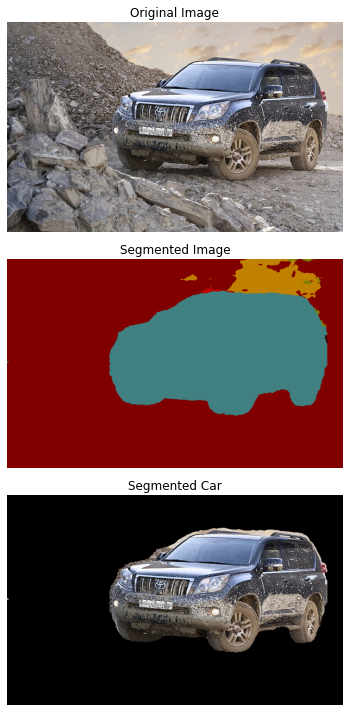

In [6]:
# compare original with segmented image
img = cv2.imread(random_img)
mask_pth = random_img.replace('data/',  'output/').replace('.jpg', '.png')
seg_img = cv2.imread(mask_pth)
# segment car
seg_car = carw_utils.segment_car(img_path=random_img, mask_path=mask_pth)

# visualize
plt.figure(figsize=(10, 10))
plt.subplot(311); plt.imshow(img[...,::-1]); plt.axis('off')
plt.title('Original Image')
plt.subplot(312); plt.imshow(seg_img[...,::-1]); plt.axis('off')
plt.title('Segmented Image')
plt.subplot(313); plt.imshow(seg_car[...,::-1]); plt.axis('off')
plt.title('Segmented Car')
plt.tight_layout()